In [1]:
library(tidyr)
library(dplyr)
library(ggiraphExtra)
library(ggplot2)
library(grafify)
library(patchwork)
library(facefuns)
library(signal)

Warning message:
“package ‘tidyr’ was built under R version 4.1.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘ggiraphExtra’ was built under R version 4.1.2”
Warning message:
“package ‘grafify’ was built under R version 4.1.2”


#### Figure 3

In [2]:
center_scale <- function(x) {
    scale(x, scale = TRUE)
}

spc <- read.csv('/Users/lindan/Dropbox/PhD/Projects/PLF/FTIR/Data/JM006_spc.csv', sep = ",", header = T, row.names = 1)
names(spc) <- gsub("^X", "", names(spc))

spc_s <- spc %>% filter(disease == 1)
spc_filtered <- spc_s[, which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < 3000)]
spc_filtered <- spc_filtered[, which(as.numeric(colnames(spc_filtered)) < 1580 | as.numeric(colnames(spc_filtered)) > 1700)]
spc_filtered <- t(center_scale(t(spc_filtered))) %>% as.data.frame()
maha <- mahalanobis(spc_filtered, colMeans(spc_filtered), cov(spc_filtered), inverted = TRUE)
spc_filtered$mahal <- list(maha)[[1]]
spc_filtered$p <- pchisq(spc_filtered$mahal, df=486, lower.tail=FALSE)
spc_filtered$outlier <- ifelse(spc_filtered$mahal > 5*sd(spc_filtered$mahal), 1, 0)
spc_filtered$vial <- spc_s$vial
spc_filtered$disease <- spc_s$disease
spc_filtered_d_id <- spc_filtered %>% filter(outlier == 1)
spc_filtered_d_id <- spc_filtered_d_id$vial

spc_s <- spc %>% filter(disease == 0)
spc_filtered <- spc_s[, which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < 3000)]
spc_filtered <- spc_filtered[, which(as.numeric(colnames(spc_filtered)) < 1580 | as.numeric(colnames(spc_filtered)) > 1700)]
spc_filtered <- t(center_scale(t(spc_filtered))) %>% as.data.frame()
maha <- mahalanobis(spc_filtered, colMeans(spc_filtered), cov(spc_filtered), inverted = TRUE)
spc_filtered$mahal <- list(maha)[[1]]
spc_filtered$p <- pchisq(spc_filtered$mahal, df=486, lower.tail=FALSE)
spc_filtered$outlier <- ifelse(spc_filtered$mahal > 5*sd(spc_filtered$mahal), 1, 0)
spc_filtered$vial <- spc_s$vial
spc_filtered$disease <- spc_s$disease
spc_filtered_h_id <- spc_filtered %>% filter(outlier == 1)
spc_filtered_h_id <- spc_filtered_h_id$vial

spc_filtered_id <- c(spc_filtered_d_id, spc_filtered_h_id)

Warning message in which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < :
“NAs introduced by coercion”
Warning message in which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < :
“NAs introduced by coercion”
Warning message in which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < :
“NAs introduced by coercion”
Warning message in which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < :
“NAs introduced by coercion”


Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message in which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < :
“NAs introduced by coercion”
Warning message in which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < :
“NAs introduced by coercion”
Warning message in which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < :
“NAs introduced by coercion”
Warning message in which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < :
“NAs introduced by coercion”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in var(if (is.vector(x) || is.fact

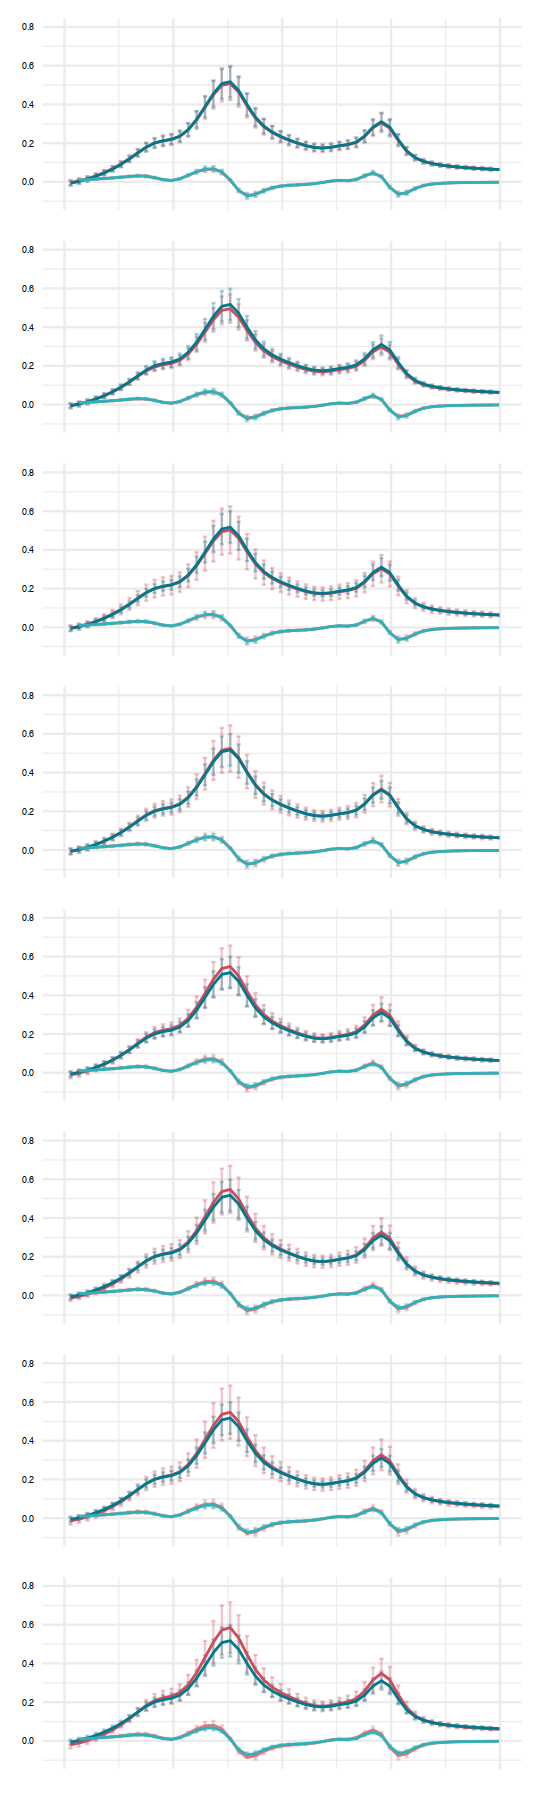

In [3]:
main_theme = theme_minimal() + 
    theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 5, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0),
    legend.key=element_blank()) 

spc_s <- spc
spc_filtered <- spc_s[, which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < 3000)]
spc_filtered <- spc_filtered[, which(as.numeric(colnames(spc_filtered)) < 1580 | as.numeric(colnames(spc_filtered)) > 1700)]
spc_filtered$vial <- spc_s$vial
spc_filtered <- cbind(spc_filtered, spc_s[,937:953])
spc_filtered <- spc_filtered %>% dplyr::filter(!vial %in% spc_filtered_id)
spc_s <- spc
spc_filtered_de <- spc_s[, which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < 3000)]
spc_filtered_de <- spc_filtered_de[, which(as.numeric(colnames(spc_filtered_de)) < 1580 | as.numeric(colnames(spc_filtered_de)) > 1700)]
sorted_cols <- sort(as.numeric(colnames(spc_filtered_de)), decreasing = TRUE)
spc_filtered_de <- spc_filtered_de[, as.character(sorted_cols)]
wn <- colnames(spc_filtered_de)
spc_filtered_de <- t(apply(spc_filtered_de, 1, function(x) sgolayfilt(x, p = 1, n = 3, m = 1))) %>% as.data.frame()
colnames(spc_filtered_de) <- wn
spc_filtered_de$vial <- spc_s$vial
spc_filtered_de <- cbind(spc_filtered_de, spc_s[,937:953])
spc_filtered_de <- spc_filtered_de %>% filter(!vial %in% spc_filtered_id)

pd <- position_dodge(0.1) 
                           
data_d <- spc_filtered %>% filter(disease == 1) %>% filter(disease_in > 14)
data_d <- data_d[,c(1:487)] 
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease', length(d_sd)), rep('health', length(h_sd))))
data_d <- spc_filtered_de %>% filter(disease == 1) %>% filter(disease_in > 14)
data_d <- data_d[,c(1:487)] 
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered_de %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se_de <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease_de', length(d_sd)), rep('health_de', length(h_sd))))
se <- rbind(se, se_de)
p1 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.6) +
    scale_color_manual(values=c('#d1495b', '#E37478', '#00798c', '#2EB2BA')) + 
    scale_x_reverse() +
    xlim(3000, 2800) +
    ylim(-0.1, 0.8) +
    main_theme
                        
data_d <- spc_filtered %>% filter(disease == 1) %>% filter(disease_in <= 14) %>% filter(disease_in >= 11) 
data_d <- data_d[,c(1:487)] 
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease', length(d_sd)), rep('health', length(h_sd))))
data_d <- spc_filtered_de %>% filter(disease == 1) %>% filter(disease_in <= 14) %>% filter(disease_in >= 11) 
data_d <- data_d[,c(1:487)] 
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered_de %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se_de <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease_de', length(d_sd)), rep('health_de', length(h_sd))))
se <- rbind(se, se_de)
p2 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.6) +
    scale_color_manual(values=c('#d1495b', '#E37478', '#00798c', '#2EB2BA')) + 
    scale_x_reverse() +
    xlim(3000, 2800) +
    ylim(-0.1, 0.8) +
    main_theme

data_d <- spc_filtered %>% filter(disease == 1) %>% filter(disease_in <= 10) %>% filter(disease_in >= 8) 
data_d <- data_d[,c(1:487)] 
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease', length(d_sd)), rep('health', length(h_sd))))
data_d <- spc_filtered_de %>% filter(disease == 1) %>% filter(disease_in <= 10) %>% filter(disease_in >= 8) 
data_d <- data_d[,c(1:487)] 
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered_de %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se_de <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease_de', length(d_sd)), rep('health_de', length(h_sd))))
se <- rbind(se, se_de)
p3 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.6) +
    scale_color_manual(values=c('#d1495b', '#E37478', '#00798c', '#2EB2BA')) + 
    scale_x_reverse() +
    xlim(3000, 2800) +
    ylim(-0.1, 0.8) +
    main_theme

data_d <- spc_filtered %>% filter(disease == 1) %>% filter(disease_in <= 7) %>% filter(disease_in >= 6) 
data_d <- data_d[,c(1:487)]
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease', length(d_sd)), rep('health', length(h_sd))))
data_d <- spc_filtered_de %>% filter(disease == 1) %>% filter(disease_in <= 7) %>% filter(disease_in >= 6) 
data_d <- data_d[,c(1:487)] 
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered_de %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se_de <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease_de', length(d_sd)), rep('health_de', length(h_sd))))
se <- rbind(se, se_de)
p4 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.6) +
    scale_color_manual(values=c('#d1495b', '#E37478', '#00798c', '#2EB2BA')) + 
    scale_x_reverse() +
    xlim(3000, 2800) +
    ylim(-0.1, 0.8) +
    main_theme

data_d <- spc_filtered %>% filter(disease == 1) %>% filter(disease_in <= 5) %>% filter(disease_in >= 4) 
data_d <- data_d[,c(1:487)] 
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease', length(d_sd)), rep('health', length(h_sd))))
data_d <- spc_filtered_de %>% filter(disease == 1) %>% filter(disease_in <= 5) %>% filter(disease_in >= 4) 
data_d <- data_d[,c(1:487)] 
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered_de %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se_de <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease_de', length(d_sd)), rep('health_de', length(h_sd))))
se <- rbind(se, se_de)
p5 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.6) +
    scale_color_manual(values=c('#d1495b', '#E37478', '#00798c', '#2EB2BA')) + 
    scale_x_reverse() +
    xlim(3000, 2800) +
    ylim(-0.1, 0.8) +
    main_theme

data_d <- spc_filtered %>% filter(disease == 1) %>% filter(disease_in == 3)
data_d <- data_d[,c(1:487)] 
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease', length(d_sd)), rep('health', length(h_sd))))
data_d <- spc_filtered_de %>% filter(disease == 1) %>% filter(disease_in == 3)
data_d <- data_d[,c(1:487)] 
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered_de %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se_de <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease_de', length(d_sd)), rep('health_de', length(h_sd))))
se <- rbind(se, se_de)
p6 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.6) +
    scale_color_manual(values=c('#d1495b', '#E37478', '#00798c', '#2EB2BA')) + 
    scale_x_reverse() +
    xlim(3000, 2800) +
    ylim(-0.1, 0.8) +
    main_theme

data_d <- spc_filtered %>% filter(disease == 1) %>% filter(disease_in == 2)
data_d <- data_d[,c(1:487)] 
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease', length(d_sd)), rep('health', length(h_sd))))
data_d <- spc_filtered_de %>% filter(disease == 1) %>% filter(disease_in == 2)
data_d <- data_d[,c(1:487)] 
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered_de %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se_de <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease_de', length(d_sd)), rep('health_de', length(h_sd))))
se <- rbind(se, se_de)
p7 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.6) +
    scale_color_manual(values=c('#d1495b', '#E37478', '#00798c', '#2EB2BA')) + 
    scale_x_reverse() +
    xlim(3000, 2800) +
    ylim(-0.1, 0.8) +
    main_theme

data_d <- spc_filtered %>% filter(disease == 1) %>% filter(disease_in == 1)
data_d <- data_d[,c(1:487)]
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease', length(d_sd)), rep('health', length(h_sd))))
data_d <- spc_filtered_de %>% filter(disease == 1) %>% filter(disease_in == 1)
data_d <- data_d[,c(1:487)] 
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered_de %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se_de <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease_de', length(d_sd)), rep('health_de', length(h_sd))))
se <- rbind(se, se_de)
p8 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.6) +
    scale_color_manual(values=c('#d1495b', '#E37478', '#00798c', '#2EB2BA')) + 
    scale_x_reverse() +
    xlim(3000, 2800) +
    ylim(-0.1, 0.8) +
    main_theme

options(repr.plot.width=4.5, repr.plot.height=15)
p1 + p2 + p3 + p4 + p5 + p6 + p7 + p8 + plot_layout(nrow = 8)

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FU

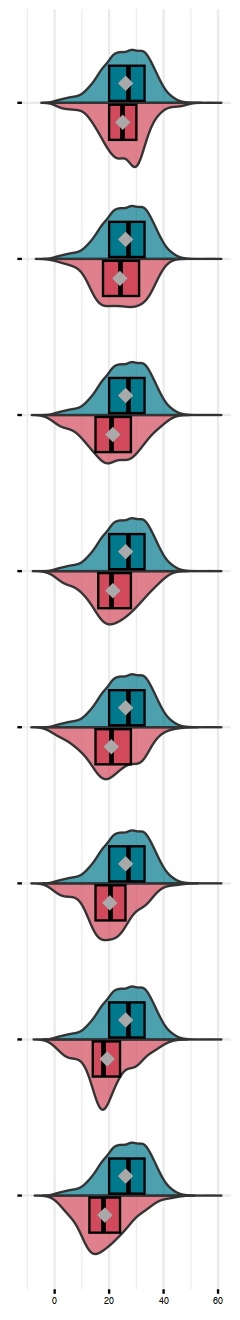

In [4]:
data <- read.csv('/Users/lindan/Dropbox/PhD/Projects/PLF/FTIR/Data/JM006_0603.csv', sep = ",", header = T, row.names = NULL)
data$dim_met[data$dim_met > 30] <- NA
data$dim_da[data$dim_da > 30] <- NA
data$dim_ket[data$dim_ket > 30] <- NA
data$dim_mast[data$dim_mast > 30] <- NA
data$disease_min <- apply(data[, 45:48], 1, min, na.rm = TRUE)
data$disease <- ifelse(is.finite(data$disease_min), 1, 0)
data_d <- data %>% filter(disease == 1) %>% filter(dim <= 15) %>% filter(dim < disease_min) 
data_h <- data %>% filter(disease == 0) %>% filter(dim <= 15) 
data <- rbind(data_d, data_h)
data$met_in <- data$dim_met - data$dim
data$da_in <- data$dim_da - data$dim
data$ket_in <- data$dim_ket - data$dim
data$mast_in <- data$dim_mast - data$dim
data$disease_in <- apply(data[, c('met_in', 'da_in', 'ket_in', 'mast_in')], 1, min, na.rm = TRUE)
data <- subset(data, select = c(cow_id, vial, milkweightlbs, parity, cells, conductivity, dim, dim_met, dim_da, dim_ket, dim_mast, met_in, da_in, ket_in, mast_in, disease_in, disease_min, disease))

data_h <- data %>% filter(disease == 0) 
data_d14 <- data %>% filter(disease == 1) %>% filter(disease_in > 14) 
data_d11 <- data %>% filter(disease == 1) %>% filter(disease_in <= 14) %>% filter(disease_in >= 11)
data_d8 <- data %>% filter(disease == 1) %>% filter(disease_in <= 10) %>% filter(disease_in >= 8) 
data_d6 <- data %>% filter(disease == 1) %>% filter(disease_in <= 7) %>% filter(disease_in >= 6) 
data_d4 <- data %>% filter(disease == 1) %>% filter(disease_in <= 5) %>% filter(disease_in >= 4) 
data_d3 <- data %>% filter(disease == 1) %>% filter(disease_in == 3) 
data_d2 <- data %>% filter(disease == 1) %>% filter(disease_in == 2) 
data_d1 <- data %>% filter(disease == 1) %>% filter(disease_in == 1) 

data_dh <- data.frame(milkweight = c(data_d14$milkweightlbs, data_h$milkweightlbs, data_d11$milkweightlbs, data_h$milkweightlbs, data_d8$milkweightlbs, data_h$milkweightlbs, data_d6$milkweightlbs, data_h$milkweightlbs, data_d4$milkweightlbs, data_h$milkweightlbs, data_d3$milkweightlbs, data_h$milkweightlbs, data_d2$milkweightlbs, data_h$milkweightlbs, data_d1$milkweightlbs, data_h$milkweightlbs),
           day = c(rep('>-14 Days', length(c(data_d14$milkweightlbs, data_h$milkweightlbs))), rep('-14 - -11 Days', length(c(data_d11$milkweightlbs, data_h$milkweightlbs))), rep('-10 - -8 Days', length(c(data_d8$milkweightlbs, data_h$milkweightlbs))), rep('-7 - -6 Days', length(c(data_d6$milkweightlbs, data_h$milkweightlbs))), rep('-5 - -4 Days', length(c(data_d4$milkweightlbs, data_h$milkweightlbs))), rep('-3 Days', length(c(data_d3$milkweightlbs, data_h$milkweightlbs))), rep('-2 Days', length(c(data_d2$milkweightlbs, data_h$milkweightlbs))), rep('-1 Days', length(c(data_d1$milkweightlbs, data_h$milkweightlbs)))),
           group = c(rep('disease', length(data_d14$milkweightlbs)), rep('health', length(data_h$milkweightlbs)), rep('disease', length(data_d11$milkweightlbs)), rep('health', length(data_h$milkweightlbs)), rep('disease', length(data_d8$milkweightlbs)), rep('health', length(data_h$milkweightlbs)), rep('disease', length(data_d6$milkweightlbs)), rep('health', length(data_h$milkweightlbs)), rep('disease', length(data_d4$milkweightlbs)), rep('health', length(data_h$milkweightlbs)), rep('disease', length(data_d3$milkweightlbs)), rep('health', length(data_h$milkweightlbs)), rep('disease', length(data_d2$milkweightlbs)), rep('health', length(data_h$milkweightlbs)), rep('disease', length(data_d1$milkweightlbs)), rep('health', length(data_h$milkweightlbs)))
                  )
data_dh$day <- factor(data_dh$day, levels=c("-1 Days", "-2 Days", "-3 Days", "-5 - -4 Days", "-7 - -6 Days", "-10 - -8 Days", "-14 - -11 Days", ">-14 Days"))
data_dh$group <- factor(data_dh$group, levels=c("disease", "health"))
options(repr.plot.width=2, repr.plot.height=11)
ggplot(data_dh, aes(day, milkweight, fill=group)) + 
  geom_split_violin(alpha = .7, trim = FALSE) + 
  geom_boxplot(color = 'black', width = 0.5, notch = FALSE, notchwidth = .4, outlier.shape = NA, coef=0) +
  stat_summary(fun.y = mean, color = "darkgrey", position = position_dodge(0.5), geom = "point", shape = 18, size = 4, show.legend = FALSE) +
  scale_fill_manual(values=c('#d1495b', '#00798c')) + 
  theme_minimal() +
  theme(legend.position = "none",
        plot.title = element_text(size = 22),
        axis.title.x = element_text(size = 0, color = "black", hjust = 0.5),
        axis.title.y = element_text(size = 0,color = "black", hjust = 0.5),
        axis.ticks = element_line(color = "black"), 
        axis.text.y = element_text(color = "black", size = 0),
        axis.text.x = element_text(color = "black", size = 5)) +
    coord_flip()

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FU

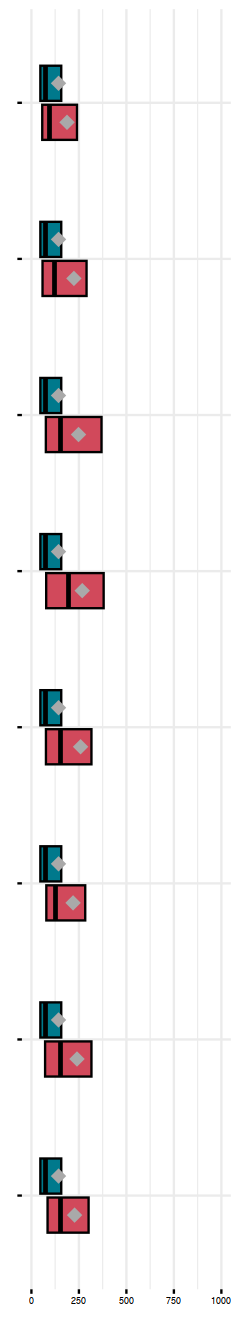

In [5]:
data <- read.csv('/Users/lindan/Dropbox/PhD/Projects/PLF/FTIR/Data/JM006_0603.csv', sep = ",", header = T, row.names = NULL)
data$dim_met[data$dim_met > 30] <- NA
data$dim_da[data$dim_da > 30] <- NA
data$dim_ket[data$dim_ket > 30] <- NA
data$dim_mast[data$dim_mast > 30] <- NA
data$disease_min <- apply(data[, 45:48], 1, min, na.rm = TRUE)
data$disease <- ifelse(is.finite(data$disease_min), 1, 0)
data_d <- data %>% filter(disease == 1) %>% filter(dim <= 15) %>% filter(dim < disease_min) 
data_h <- data %>% filter(disease == 0) %>% filter(dim <= 15) 
data <- rbind(data_d, data_h)
data$met_in <- data$dim_met - data$dim
data$da_in <- data$dim_da - data$dim
data$ket_in <- data$dim_ket - data$dim
data$mast_in <- data$dim_mast - data$dim
data$disease_in <- apply(data[, c('met_in', 'da_in', 'ket_in', 'mast_in')], 1, min, na.rm = TRUE)
data <- subset(data, select = c(cow_id, vial, milkweightlbs, parity, cells, conductivity, dim, dim_met, dim_da, dim_ket, dim_mast, met_in, da_in, ket_in, mast_in, disease_in, disease_min, disease))

data_h <- data %>% filter(disease == 0) 
data_d14 <- data %>% filter(disease == 1) %>% filter(disease_in > 14) 
data_d11 <- data %>% filter(disease == 1) %>% filter(disease_in <= 14) %>% filter(disease_in >= 11)
data_d8 <- data %>% filter(disease == 1) %>% filter(disease_in <= 10) %>% filter(disease_in >= 8) 
data_d6 <- data %>% filter(disease == 1) %>% filter(disease_in <= 7) %>% filter(disease_in >= 6) 
data_d4 <- data %>% filter(disease == 1) %>% filter(disease_in <= 5) %>% filter(disease_in >= 4) 
data_d3 <- data %>% filter(disease == 1) %>% filter(disease_in == 3) 
data_d2 <- data %>% filter(disease == 1) %>% filter(disease_in == 2) 
data_d1 <- data %>% filter(disease == 1) %>% filter(disease_in == 1) 

data_dh <- data.frame(cells = c(data_d14$cells, data_h$cells, data_d11$cells, data_h$cells, data_d8$cells, data_h$cells, data_d6$cells, data_h$cells, data_d4$cells, data_h$cells, data_d3$cells, data_h$cells, data_d2$cells, data_h$cells, data_d1$cells, data_h$cells),
           day = c(rep('>-14 Days', length(c(data_d14$cells, data_h$cells))), rep('-14 - -11 Days', length(c(data_d11$cells, data_h$cells))), rep('-10 - -8 Days', length(c(data_d8$cells, data_h$cells))), rep('-7 - -6 Days', length(c(data_d6$cells, data_h$cells))), rep('-5 - -4 Days', length(c(data_d4$cells, data_h$cells))), rep('-3 Days', length(c(data_d3$cells, data_h$cells))), rep('-2 Days', length(c(data_d2$cells, data_h$cells))), rep('-1 Days', length(c(data_d1$cells, data_h$cells)))),
           group = c(rep('disease', length(data_d14$cells)), rep('health', length(data_h$cells)), rep('disease', length(data_d11$cells)), rep('health', length(data_h$cells)), rep('disease', length(data_d8$cells)), rep('health', length(data_h$cells)), rep('disease', length(data_d6$cells)), rep('health', length(data_h$cells)), rep('disease', length(data_d4$cells)), rep('health', length(data_h$cells)), rep('disease', length(data_d3$cells)), rep('health', length(data_h$cells)), rep('disease', length(data_d2$cells)), rep('health', length(data_h$cells)), rep('disease', length(data_d1$cells)), rep('health', length(data_h$cells)))
                  )
data_dh$day <- factor(data_dh$day, levels=c("-1 Days", "-2 Days", "-3 Days", "-5 - -4 Days", "-7 - -6 Days", "-10 - -8 Days", "-14 - -11 Days", ">-14 Days"))
data_dh$group <- factor(data_dh$group, levels=c("disease", "health"))
options(repr.plot.width=2, repr.plot.height=11)
ggplot(data_dh, aes(day, cells, fill=group)) + 
  geom_boxplot(color = 'black', width = 0.5, notch = FALSE, notchwidth = .4, outlier.shape = NA, coef=0) +
  stat_summary(fun.y = mean, color = "darkgrey", position = position_dodge(0.5), geom = "point", shape = 18, size = 4, show.legend = FALSE) +
  scale_fill_manual(values=c('#d1495b', '#00798c')) + 
  ylim(0, 1000) +
  theme_minimal() +
  theme(legend.position = "none",
        plot.title = element_text(size = 22),
        axis.title.x = element_text(size = 0, color = "black", hjust = 0.5),
        axis.title.y = element_text(size = 0,color = "black", hjust = 0.5),
        axis.ticks = element_line(color = "black"), 
        axis.text.y = element_text(color = "black", size = 0),
        axis.text.x = element_text(color = "black", size = 5)) +
    coord_flip()

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FU

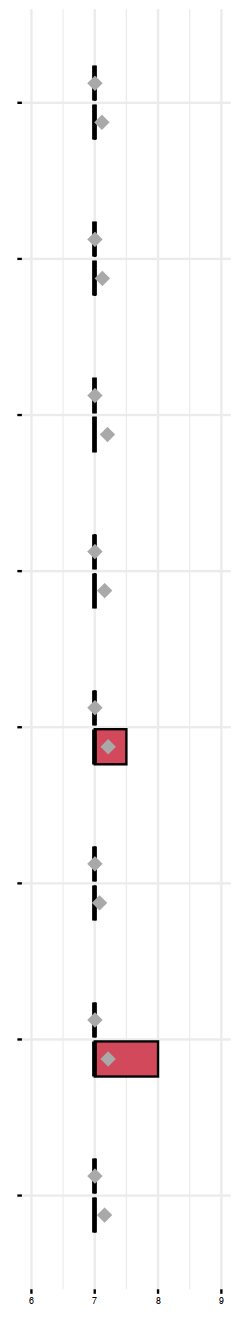

In [6]:
data <- read.csv('/Users/lindan/Dropbox/PhD/Projects/PLF/FTIR/Data/JM006_0603.csv', sep = ",", header = T, row.names = NULL)
data$dim_met[data$dim_met > 30] <- NA
data$dim_da[data$dim_da > 30] <- NA
data$dim_ket[data$dim_ket > 30] <- NA
data$dim_mast[data$dim_mast > 30] <- NA
data$disease_min <- apply(data[, 45:48], 1, min, na.rm = TRUE)
data$disease <- ifelse(is.finite(data$disease_min), 1, 0)
data_d <- data %>% filter(disease == 1) %>% filter(dim <= 15) %>% filter(dim < disease_min) 
data_h <- data %>% filter(disease == 0) %>% filter(dim <= 15) 
data <- rbind(data_d, data_h)
data$met_in <- data$dim_met - data$dim
data$da_in <- data$dim_da - data$dim
data$ket_in <- data$dim_ket - data$dim
data$mast_in <- data$dim_mast - data$dim
data$disease_in <- apply(data[, c('met_in', 'da_in', 'ket_in', 'mast_in')], 1, min, na.rm = TRUE)
data <- subset(data, select = c(cow_id, vial, milkweightlbs, parity, conductivity, conductivity, dim, dim_met, dim_da, dim_ket, dim_mast, met_in, da_in, ket_in, mast_in, disease_in, disease_min, disease))

data_h <- data %>% filter(disease == 0) 
data_d14 <- data %>% filter(disease == 1) %>% filter(disease_in > 14) 
data_d11 <- data %>% filter(disease == 1) %>% filter(disease_in <= 14) %>% filter(disease_in >= 11)
data_d8 <- data %>% filter(disease == 1) %>% filter(disease_in <= 10) %>% filter(disease_in >= 8) 
data_d6 <- data %>% filter(disease == 1) %>% filter(disease_in <= 7) %>% filter(disease_in >= 6) 
data_d4 <- data %>% filter(disease == 1) %>% filter(disease_in <= 5) %>% filter(disease_in >= 4) 
data_d3 <- data %>% filter(disease == 1) %>% filter(disease_in == 3) 
data_d2 <- data %>% filter(disease == 1) %>% filter(disease_in == 2) 
data_d1 <- data %>% filter(disease == 1) %>% filter(disease_in == 1) 

data_dh <- data.frame(conductivity = c(data_d14$conductivity, data_h$conductivity, data_d11$conductivity, data_h$conductivity, data_d8$conductivity, data_h$conductivity, data_d6$conductivity, data_h$conductivity, data_d4$conductivity, data_h$conductivity, data_d3$conductivity, data_h$conductivity, data_d2$conductivity, data_h$conductivity, data_d1$conductivity, data_h$conductivity),
           day = c(rep('>-14 Days', length(c(data_d14$conductivity, data_h$conductivity))), rep('-14 - -11 Days', length(c(data_d11$conductivity, data_h$conductivity))), rep('-10 - -8 Days', length(c(data_d8$conductivity, data_h$conductivity))), rep('-7 - -6 Days', length(c(data_d6$conductivity, data_h$conductivity))), rep('-5 - -4 Days', length(c(data_d4$conductivity, data_h$conductivity))), rep('-3 Days', length(c(data_d3$conductivity, data_h$conductivity))), rep('-2 Days', length(c(data_d2$conductivity, data_h$conductivity))), rep('-1 Days', length(c(data_d1$conductivity, data_h$conductivity)))),
           group = c(rep('disease', length(data_d14$conductivity)), rep('health', length(data_h$conductivity)), rep('disease', length(data_d11$conductivity)), rep('health', length(data_h$conductivity)), rep('disease', length(data_d8$conductivity)), rep('health', length(data_h$conductivity)), rep('disease', length(data_d6$conductivity)), rep('health', length(data_h$conductivity)), rep('disease', length(data_d4$conductivity)), rep('health', length(data_h$conductivity)), rep('disease', length(data_d3$conductivity)), rep('health', length(data_h$conductivity)), rep('disease', length(data_d2$conductivity)), rep('health', length(data_h$conductivity)), rep('disease', length(data_d1$conductivity)), rep('health', length(data_h$conductivity)))
                  )
data_dh$day <- factor(data_dh$day, levels=c("-1 Days", "-2 Days", "-3 Days", "-5 - -4 Days", "-7 - -6 Days", "-10 - -8 Days", "-14 - -11 Days", ">-14 Days"))
data_dh$group <- factor(data_dh$group, levels=c("disease", "health"))
options(repr.plot.width=2, repr.plot.height=11)
ggplot(data_dh, aes(day, conductivity, fill=group)) + 
  geom_boxplot(color = 'black', width = 0.5, notch = FALSE, notchwidth = .4, outlier.shape = NA, coef=0) +
  stat_summary(fun.y = mean, color = "darkgrey", position = position_dodge(0.5), geom = "point", shape = 18, size = 4, show.legend = FALSE) +
  scale_fill_manual(values=c('#d1495b', '#00798c')) + 
  ylim(6, 9) +
  theme_minimal() +
  theme(legend.position = "none",
        plot.title = element_text(size = 22),
        axis.title.x = element_text(size = 0, color = "black", hjust = 0.5),
        axis.title.y = element_text(size = 0,color = "black", hjust = 0.5),
        axis.ticks = element_line(color = "black"), 
        axis.text.y = element_text(color = "black", size = 0),
        axis.text.x = element_text(color = "black", size = 5)) +
    coord_flip()